# Imports

In [2]:
import rdflib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Files

In [3]:
!pwd

/home/andre279m/Faculdade/Theses


In [4]:
gene_ontology_file_path = 'DB/go.owl'
protein_file_path = 'DB/9606.protein.enrichment.terms.v12.0.txt'
protein_links_file_path = 'DB/9606.protein.links.v12.0.txt'
protein_full_links_file_path = 'DB/9606.protein.links.detailed.v12.0.txt'

# Distribution of Confidence

In [5]:
data = pd.read_csv(protein_links_file_path, sep=" ", header=0)
data

,protein1,protein2,combined_score
0,9606.ENSP00000000233,9606.ENSP00000356607,173
1,9606.ENSP00000000233,9606.ENSP00000427567,154
2,9606.ENSP00000000233,9606.ENSP00000253413,151
3,9606.ENSP00000000233,9606.ENSP00000493357,471
4,9606.ENSP00000000233,9606.ENSP00000324127,201
...,...,...,...
13715399,9606.ENSP00000501317,9606.ENSP00000475489,195
13715400,9606.ENSP00000501317,9606.ENSP00000370447,158
13715401,9606.ENSP00000501317,9606.ENSP00000312272,226
13715402,9606.ENSP00000501317,9606.ENSP00000402092,169


In [9]:
p =[]

with open(protein_file_path , 'r') as prot_annot:
    prot_annot.readline()
    for line in prot_annot:
        elements_annot = line.split('\t')
        id_prot, GO_term = elements_annot[0], elements_annot[2]
        if GO_term.startswith('GO:') :
            if id_prot not in p:
                p.append(id_prot)
p

['9606.ENSP00000000233',
 '9606.ENSP00000000412',
 '9606.ENSP00000001008',
 '9606.ENSP00000001146',
 '9606.ENSP00000002125',
 '9606.ENSP00000002165',
 '9606.ENSP00000002596',
 '9606.ENSP00000002829',
 '9606.ENSP00000003084',
 '9606.ENSP00000003100',
 '9606.ENSP00000003302',
 '9606.ENSP00000004531',
 '9606.ENSP00000004982',
 '9606.ENSP00000005178',
 '9606.ENSP00000005226',
 '9606.ENSP00000005257',
 '9606.ENSP00000005260',
 '9606.ENSP00000005284',
 '9606.ENSP00000005286',
 '9606.ENSP00000005340',
 '9606.ENSP00000005386',
 '9606.ENSP00000005587',
 '9606.ENSP00000005995',
 '9606.ENSP00000006015',
 '9606.ENSP00000006053',
 '9606.ENSP00000006275',
 '9606.ENSP00000006526',
 '9606.ENSP00000006658',
 '9606.ENSP00000006724',
 '9606.ENSP00000006777',
 '9606.ENSP00000007390',
 '9606.ENSP00000007414',
 '9606.ENSP00000007699',
 '9606.ENSP00000007735',
 '9606.ENSP00000008391',
 '9606.ENSP00000008527',
 '9606.ENSP00000008938',
 '9606.ENSP00000009041',
 '9606.ENSP00000009105',
 '9606.ENSP00000009530',


In [10]:
len(p)

18876

In [11]:
dataX = data.where(data["protein1"].values in p and data["protein2"].values in p).dropna()
dataX

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
data_full = pd.read_csv(protein_full_links_file_path, sep=" ", header=0)
data_full

,protein1,protein2,neighborhood,fusion,cooccurence,coexpression,experimental,database,textmining,combined_score
0,9606.ENSP00000000233,9606.ENSP00000356607,0,0,0,45,134,0,81,173
1,9606.ENSP00000000233,9606.ENSP00000427567,0,0,0,0,128,0,70,154
2,9606.ENSP00000000233,9606.ENSP00000253413,0,0,0,118,49,0,69,151
3,9606.ENSP00000000233,9606.ENSP00000493357,0,0,0,56,53,0,457,471
4,9606.ENSP00000000233,9606.ENSP00000324127,0,0,0,0,46,0,197,201
...,...,...,...,...,...,...,...,...,...,...
13715399,9606.ENSP00000501317,9606.ENSP00000475489,0,0,0,60,99,0,126,195
13715400,9606.ENSP00000501317,9606.ENSP00000370447,0,0,0,55,111,0,79,158
13715401,9606.ENSP00000501317,9606.ENSP00000312272,0,0,0,0,0,0,227,226
13715402,9606.ENSP00000501317,9606.ENSP00000402092,0,0,0,0,67,0,146,169


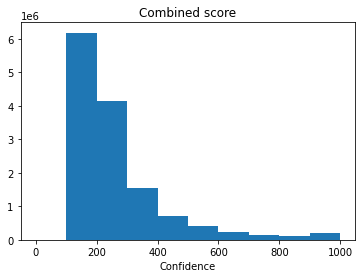

In [6]:
plt.hist(data_full['combined_score'],bins=10,bottom=list(range(0,1000,100)),range=(0,1000));
plt.xlabel('Confidence')
plt.title('Combined score')
plt.show();

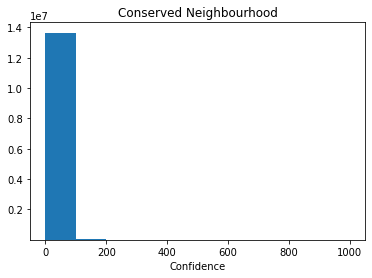

In [7]:
plt.hist(data_full['neighborhood'],bins=10,bottom=list(range(0,1000,100)),range=(0,1000));
plt.xlabel('Confidence')
plt.title('Conserved Neighbourhood')
plt.show();

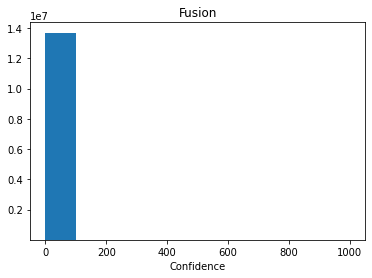

In [8]:
plt.hist(data_full['fusion'],bins=10,bottom=list(range(0,1000,100)),range=(0,1000));
plt.xlabel('Confidence')
plt.title('Fusion')
plt.show();

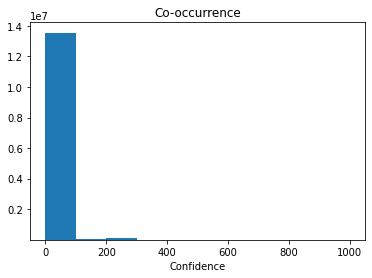

In [9]:
plt.hist(data_full['cooccurence'],bins=10,bottom=list(range(0,1000,100)),range=(0,1000));
plt.xlabel('Confidence')
plt.title('Co-occurrence')
plt.show();

plt.hist(data_full['homology'],bins=10,bottom=list(range(0,1000,100)),range=(0,1000));
plt.xlabel('Confidence')
plt.title('Homology')
plt.show();

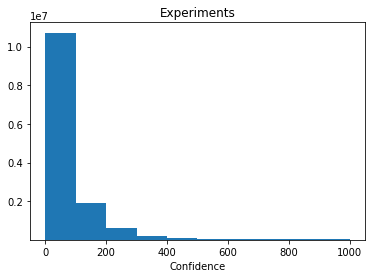

In [10]:
plt.hist(data_full['experimental'],bins=10,bottom=list(range(0,1000,100)),range=(0,1000));
plt.xlabel('Confidence')
plt.title('Experiments')
plt.show();

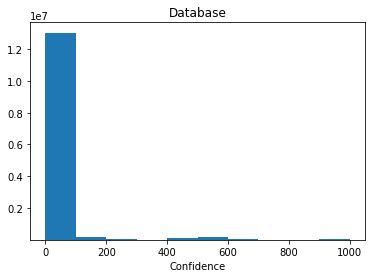

In [11]:
plt.hist(data_full['database'],bins=10,bottom=list(range(0,1000,100)),range=(0,1000));
plt.xlabel('Confidence')
plt.title('Database')
plt.show();

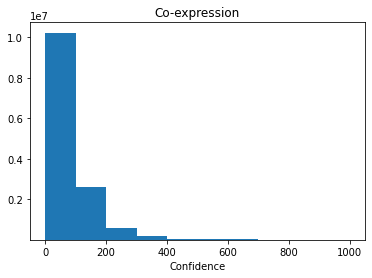

In [12]:
plt.hist(data_full['coexpression'],bins=10,bottom=list(range(0,1000,100)),range=(0,1000));
plt.xlabel('Confidence')
plt.title('Co-expression')
plt.show();

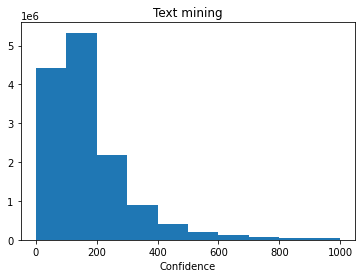

In [13]:
plt.hist(data_full['textmining'],bins=10,bottom=list(range(0,1000,100)),range=(0,1000));
plt.xlabel('Confidence')
plt.title('Text mining')
plt.show();

# Creating thresholds

In [14]:
data8 = data.where(data['combined_score']>800).copy().dropna().sample(n=1000)
data6 = data.where(data['combined_score']>600).copy().dropna().sample(n=1000)
data4 = data.where(data['combined_score']>400).copy().dropna().sample(n=1000)
data2 = data.where(data['combined_score']>200).copy().dropna().sample(n=1000)
dataSample = data.sample(n=1000)

# Creating the Knowledge graph

In [53]:
g = rdflib.Graph()
g.parse(gene_ontology_file_path, format = 'xml');

In [54]:
prots = []

with open(protein_file_path , 'r') as prot_annot:
    prot_annot.readline()
    for line in prot_annot:
        elements_annot = line.split('\t')
        id_prot, GO_term = elements_annot[0], elements_annot[2]
        if GO_term.startswith('GO:') :
            url_GO_term = 'http://purl.obolibrary.org/obo/GO_' + GO_term.split(':')[1]
            url_prot = 'https://string-db.org/network/' + id_prot
            #if (id_prot in data2["protein1"].values or id_prot in data2["protein2"].values) and url_prot not in prots:
            #    prots.append(url_prot)
            g.add((rdflib.term.URIRef(url_prot), rdflib.term.URIRef('http://purl.obolibrary.org/obo/go.owl#has_function') , rdflib.term.URIRef(url_GO_term)))

In [55]:
# Importing Packages
from pyrdf2vec.graphs import kg
from pyrdf2vec.rdf2vec import RDF2VecTransformer
from pyrdf2vec.embedders import Word2Vec
from pyrdf2vec.samplers import UniformSampler, ObjFreqSampler, PredFreqSampler
from pyrdf2vec.walkers import RandomWalker, WeisfeilerLehmanWalker, WalkletWalker
import seaborn as sns
from sklearn import manifold

In [56]:
# Defining rdf2vec paramenters
vector_size = 200
n_walks = 100
type_word2vec = 'skip-gram'
walk_depth = 4
walker_type = 'wl'
sampler_type = 'uniform'

# Creating a pyrdf2vec graph
g_pyrdf2vec = kg.rdflib_to_kg(g)

# Defining the word2vec strategy
if type_word2vec == 'CBOW':
    sg_value = 0
elif type_word2vec == 'skip-gram':
    sg_value = 1

# Defining sampling strategy
if sampler_type.lower() == 'uniform':
    sampler = UniformSampler()
elif sampler_type.lower() == 'predfreq':
    sampler = PredFreqSampler()
elif sampler_type.lower() == 'objfreq':
    sampler = ObjFreqSampler()

# Defining warker strategy
if walker_type.lower() == 'random':
    walker = RandomWalker(depth=walk_depth, walks_per_graph=n_walks, sampler = sampler)
elif walker_type.lower() == 'wl':
    walker = WeisfeilerLehmanWalker(depth=walk_depth, walks_per_graph=n_walks, sampler = sampler)
elif walker_type.lower() == 'walklet':
    walker = WalkletWalker(depth=walk_depth, walks_per_graph=n_walks, sampler = sampler)

# Training RDF2Vec embeddings
transformer = RDF2VecTransformer(Word2Vec(size=vector_size, sg=sg_value), walkers=[walker])
embeddings = transformer.fit_transform(g_pyrdf2vec, prots)
# Saving embedding in a dictionary
dict_embeddings = {prots[i]: embeddings[i] for i in range(len(prots))}
#print(dict_embeddings)

ValueError: The provided entities must be in the Knowledge Graph.

In [ ]:
pairs_prots = []
for d in data2.values:
    pairs_prots.append(['https://string-db.org/network/' + d[0],'https://string-db.org/network/' + d[1], d[2]])

In [ ]:
# Generating pair representations using haddamard operator # other possibilities are concatenation, wl-1 or wl-2
#pairs_prots = [line.strip().split('\t') for line in open(pairs_entities_file_path).readlines()]
X, y = [], []
for prot1, prot2, label in pairs_prots:
    emb_prot1 = dict_embeddings[prot1].reshape(1, vector_size)
    emb_prot2 = dict_embeddings[prot2].reshape(1, vector_size)
    hada = np.multiply(emb_prot1, emb_prot2)
    X.append(hada.tolist()[0])
    y.append(int(label))

print("Number of protein pairs in the dataset: " + str(len(pairs_prots)))

KeyError: 'https://string-db.org/network/9606.ENSP00000491046'

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, train_test_split, StratifiedShuffleSplit
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier